In [1]:
import pandas as pd
from plotnine import *

In [57]:
node1 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-11/07_08_2021_23_43_34.csv")
node1['node'] = 1
node2 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-12/07_08_2021_23_46_44.csv")
node2['node'] = 2
node3 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-13/07_08_2021_23_43_33.csv")
node3['node'] = 3
node4 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-14/07_08_2021_23_45_13.csv")
node4['node'] = 4
node5 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-15/07_08_2021_23_55_41.csv")
node5['node'] = 5
node6 = pd.read_csv("Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-20/07_08_2021_23_43_43.csv")
node6['node'] = 6
node6.head(20)

,epoch,CPU,RAM,node
0,0.000000,0.0,1.8,6
1,0.158088,0.0,1.8,6
2,0.314673,0.0,1.8,6
3,0.473272,0.0,1.8,6
4,0.632178,0.0,1.8,6
5,0.790976,0.0,1.8,6
6,0.950184,0.0,1.8,6
7,1.108159,0.0,1.8,6
8,1.262963,0.0,1.8,6
9,1.421794,0.0,1.8,6


In [71]:
path = "C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/"
nodes = pd.concat([node1, node2, node3, node4, node5, node6])

p = (ggplot(nodes, aes(x='epoch', y = "RAM"))
    + geom_line(color = "orange")
    + facet_wrap('node', ncol=2)
    + labs(title=f"Przebieg zużycia RAM", y="Zużycie ram (%)", x = "Czas (s)")
  )

ggsave(plot=p, filename=f"{path}nodes_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/nodes_ram.png


In [69]:
nodes = pd.concat([node1, node2, node3, node4, node5, node6])
p = (ggplot(nodes)
    + aes(x='epoch', y = "CPU")
    + geom_line(size=0.5, color = "red")
    + facet_wrap('node', ncol=2)
    + labs(title=f"Przebieg zużycia CPU", y="Zużycie procesora (%)", x = "Czas (s)")
  )
ggsave(plot=p, filename=f"{path}nodes_cpu.png", dpi=1000)


C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/nodes_cpu.png


## Agregation

In [107]:
joined_aggregation_all = pd.read_csv("Organised/aggregation/joined_aggregation.csv")
joined_aggregation_all

,snapshot,label,udf,epoch,CPU,RAM
0,0,aggregation,avgNetProfitGroupedBySoldDate,0.000000,206.7,4.8
1,0,aggregation,avgNetProfitGroupedBySoldDate,0.156270,220.0,5.0
2,0,aggregation,avgNetProfitGroupedBySoldDate,0.314010,133.3,5.2
3,0,aggregation,avgNetProfitGroupedBySoldDate,0.471593,146.7,5.3
4,0,aggregation,avgNetProfitGroupedBySoldDate,0.628038,126.7,5.4
...,...,...,...,...,...,...
1789849,1808,aggregation,sumWholeSaleCostGroupedBySoldDate,190.090420,0.0,3.1
1789850,1808,aggregation,sumWholeSaleCostGroupedBySoldDate,190.247566,0.0,3.1
1789851,1808,aggregation,sumWholeSaleCostGroupedBySoldDate,190.404787,0.0,3.1
1789852,1808,aggregation,sumWholeSaleCostGroupedBySoldDate,190.562113,0.0,3.1


In [108]:
joined_aggregation_by_snapshots_count = joined_aggregation_all.groupby('snapshot')['epoch'].count()
joined_aggregation_by_snapshots_count

snapshot
0        563
1        496
2        557
3        583
4        759
        ... 
1804    1188
1805    1224
1806    1265
1807    1169
1808    1213
Name: epoch, Length: 1809, dtype: int64

In [144]:
aggregation_snapshot_plot = (ggplot(joined_aggregation_all, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + labs(title=f"Agregacja - długość szeregu/eksperyment", y="Długość szeregu", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_plot, filename=f"{path}aggregation_count_per_snapshot.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/aggregation_count_per_snapshot.png


In [110]:
joined_aggregation_by_snapshots_max = joined_aggregation_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].max()
joined_aggregation_by_snapshots_max

,snapshot,CPU,RAM
snapshot,,,
0,0,360.0,10.5
1,1,366.7,10.3
2,2,373.3,10.3
3,3,386.7,11.8
4,4,386.7,10.6
...,...,...,...
1804,1804,373.3,9.3
1805,1805,373.3,9.7
1806,1806,360.0,9.3


In [111]:
joined_aggregation_by_snapshots_mean = joined_aggregation_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].mean()
joined_aggregation_by_snapshots_mean

,snapshot,CPU,RAM
snapshot,,,
0,0.0,34.912611,9.710480
1,1.0,38.645363,9.426613
2,2.0,34.191382,9.507361
3,3.0,32.059177,10.967410
4,4.0,25.046904,10.041502
...,...,...,...
1804,1804.0,16.726515,8.929798
1805,1805.0,16.541176,9.195915
1806,1806.0,15.575336,8.757470


In [112]:
aggregation_snapshot_max_plot = (ggplot(joined_aggregation_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_max_plot, filename=f"{path}aggregation_max_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/aggregation_max_cpu.png


In [113]:
aggregation_snapshot_max_plot = (ggplot(joined_aggregation_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_max_plot, filename=f"{path}aggregation_max_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/aggregation_max_ram.png


In [114]:
aggregation_snapshot_mean_plot = (ggplot(joined_aggregation_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_mean_plot, filename=f"{path}aggregation_mean_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/aggregation_mean_cpu.png


In [115]:
aggregation_snapshot_mean_plot = (ggplot(joined_aggregation_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_mean_plot, filename=f"{path}aggregation_mean_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/aggregation_mean_ram.png


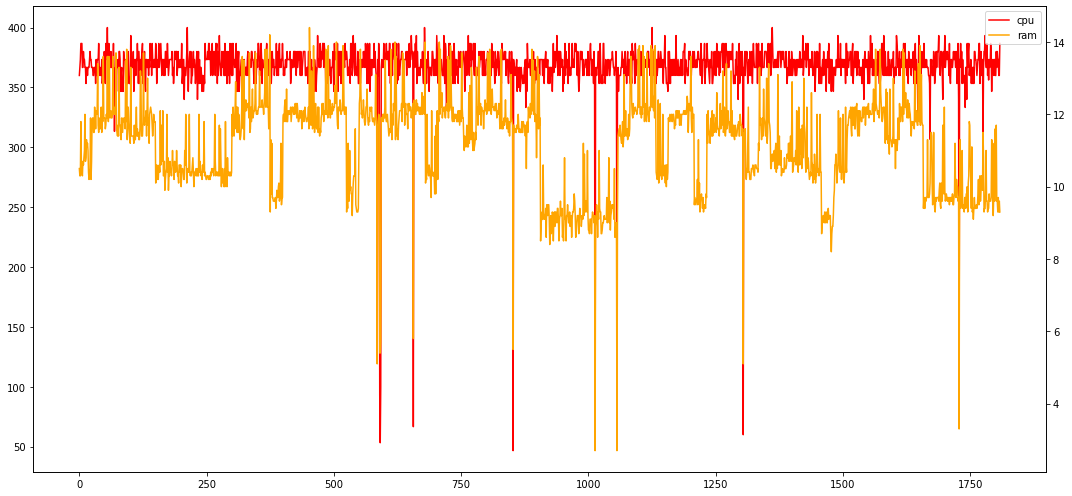

In [116]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True

cpu =joined_aggregation_by_snapshots_max['CPU']
ram = joined_aggregation_by_snapshots_max['RAM']

ax1 = plt.subplot()
l1, = ax1.plot(cpu, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(ram, color='orange')

plt.legend([l1, l2], ["cpu", "ram"])

plt.show()

## Filtration

In [117]:
joined_filtration_all = pd.read_csv("Organised/filtration/joined_filtration.csv")

In [118]:
filtration_snapshot_plot = (ggplot(joined_filtration_all, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + labs(y="Długość szeregu", x = "Eksperyment")
)
ggsave(plot=filtration_snapshot_plot, filename=f"{path}filtration_count_per_snapshot.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/filtration_count_per_snapshot.png


In [119]:
joined_filtration_by_snapshots_max = joined_filtration_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].max()
joined_filtration_by_snapshots_max

,snapshot,CPU,RAM
snapshot,,,
0,0,346.7,11.9
1,1,360.0,11.0
2,2,346.7,10.9
3,3,386.7,11.2
4,4,360.0,11.0
...,...,...,...
296,296,360.0,11.0
297,297,360.0,11.3
298,298,366.7,11.2


In [120]:
joined_filtration_by_snapshots_mean = joined_filtration_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].mean()
joined_filtration_by_snapshots_mean

,snapshot,CPU,RAM
snapshot,,,
0,0.0,91.598026,9.530263
1,1.0,86.482781,8.896026
2,2.0,95.264748,8.728058
3,3.0,97.697842,8.861871
4,4.0,90.278767,8.889726
...,...,...,...
296,296.0,44.203762,9.784013
297,297.0,56.723108,9.790040
298,298.0,56.447656,9.922656


In [121]:
filtration_snapshot_max_plot = (ggplot(joined_filtration_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=filtration_snapshot_max_plot, filename=f"{path}filtration_max_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/filtration_max_cpu.png


In [122]:
filtration_snapshot_max_plot = (ggplot(joined_filtration_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=filtration_snapshot_max_plot, filename=f"{path}filtration_max_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/filtration_max_ram.png


In [123]:
filtration_snapshot_mean_plot = (ggplot(joined_filtration_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=filtration_snapshot_mean_plot, filename=f"{path}filtration_mean_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/filtration_mean_cpu.png


In [124]:
filtration_snapshot_mean_plot = (ggplot(joined_filtration_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='red')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=filtration_snapshot_mean_plot, filename=f"{path}filtration_mean_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/filtration_mean_ram.png


## Agregation_Filtration

In [125]:
joined_aggregation_filtration_all = pd.read_csv("Organised/filtration-aggregation/joined_filtration-aggregation.csv")

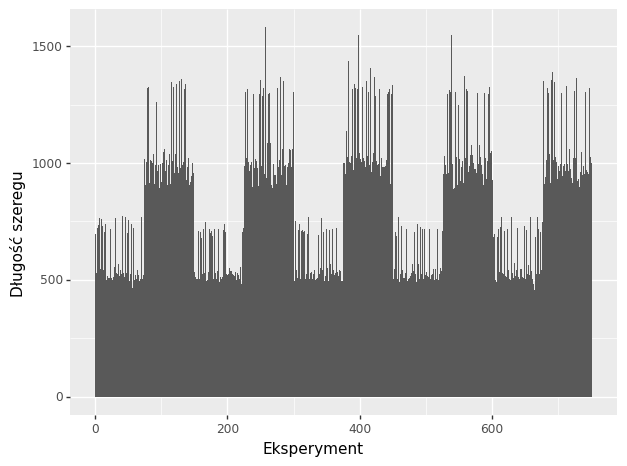

<ggplot: (152736236258)>

In [126]:
aggregation_filtration_snapshot_plot = (ggplot(joined_aggregation_filtration_all, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + labs(y="Długość szeregu", x = "Eksperyment")
)
aggregation_filtration_snapshot_plot

In [127]:
joined_aggregation_filtration_by_snapshots_max = joined_aggregation_filtration_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].max()
joined_aggregation_filtration_by_snapshots_max

,snapshot,CPU,RAM
snapshot,,,
0,0,360.0,12.1
1,1,353.3,12.3
2,2,360.0,13.8
3,3,360.0,12.3
4,4,360.0,12.1
...,...,...,...
747,747,373.3,11.9
748,748,346.7,11.9
749,749,366.7,11.8


In [128]:
joined_aggregation_filtration_by_snapshots_mean = joined_aggregation_filtration_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].mean()
joined_aggregation_filtration_by_snapshots_mean

,snapshot,CPU,RAM
snapshot,,,
0,0.0,29.406619,11.468777
1,1.0,36.585397,11.537708
2,2.0,37.067675,12.608696
3,3.0,38.433333,11.384663
4,4.0,26.364917,11.605525
...,...,...,...
747,747.0,18.237325,11.347053
748,748.0,15.936591,11.343182
749,749.0,20.014453,11.243359


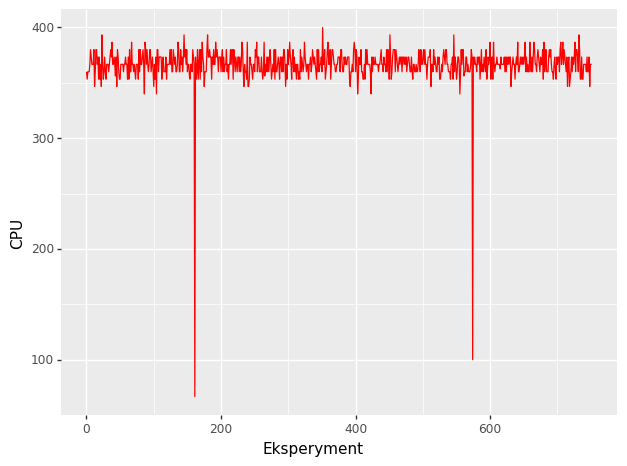

<ggplot: (152607729761)>

In [129]:
aggregation_filtration_snapshot_max_plot = (ggplot(joined_aggregation_filtration_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
aggregation_filtration_snapshot_max_plot

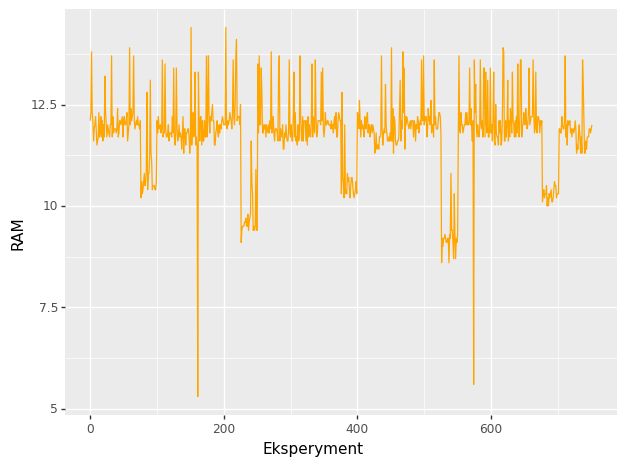

<ggplot: (152610953274)>

In [130]:
aggregation_filtration_snapshot_max_plot = (ggplot(joined_aggregation_filtration_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
aggregation_filtration_snapshot_max_plot

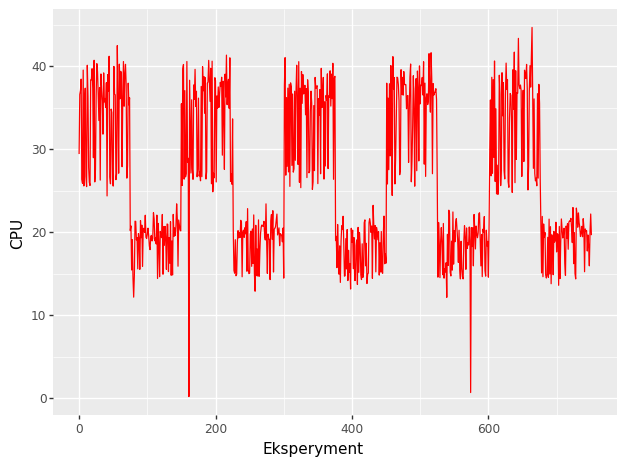

<ggplot: (152736373495)>

In [131]:
aggregation_filtration_snapshot_mean_plot = (ggplot(joined_aggregation_filtration_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
aggregation_filtration_snapshot_mean_plot

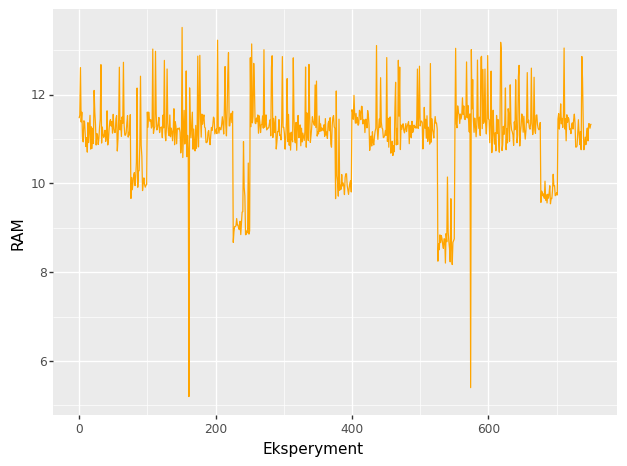

<ggplot: (152735069130)>

In [132]:
aggregation_filtration_snapshot_mean_plot = (ggplot(joined_aggregation_filtration_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
aggregation_filtration_snapshot_mean_plot

In [133]:
joined_filtration_aggregation_join_all = pd.read_csv("Organised/filtration-aggregation-join/joined_filtration-aggregation-join.csv")
joined_filtration_join_all = pd.read_csv("Organised/filtration-join/joined_filtration-join.csv")


In [134]:
all_df = pd.concat([joined_aggregation_all, joined_filtration_all, joined_aggregation_filtration_all, joined_filtration_aggregation_join_all, joined_filtration_join_all])
all_df

,snapshot,label,udf,epoch,CPU,RAM
0,0,aggregation,avgNetProfitGroupedBySoldDate,0.000000,206.7,4.8
1,0,aggregation,avgNetProfitGroupedBySoldDate,0.156270,220.0,5.0
2,0,aggregation,avgNetProfitGroupedBySoldDate,0.314010,133.3,5.2
3,0,aggregation,avgNetProfitGroupedBySoldDate,0.471593,146.7,5.3
4,0,aggregation,avgNetProfitGroupedBySoldDate,0.628038,126.7,5.4
...,...,...,...,...,...,...
128320,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.625042,0.0,5.6
128321,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.780466,0.0,5.6
128322,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.935759,0.0,5.6
128323,599,filtration-join,filterStoreSalesWhereYearAfter2000,37.091189,0.0,5.6


In [135]:
histogram_snapshot_plot = (ggplot(all_df, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + facet_wrap('label', ncol=1)
  + labs(title=f"Długość szeregu w kolejnych eksperymentach", y="Długość szeregu", x = "Eksperyment")
)
ggsave(plot=histogram_snapshot_plot, filename=f"{path}all_count.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/all_count.png
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:729: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [136]:
joined_all_by_snapshots_max = all_df.groupby(['label', 'snapshot'])[['label', 'snapshot', 'CPU', 'RAM']].max()
joined_all_by_snapshots_max = joined_all_by_snapshots_max.reset_index(drop=True)
joined_all_by_snapshots_max

,label,snapshot,CPU,RAM
0,aggregation,0,360.0,10.5
1,aggregation,1,366.7,10.3
2,aggregation,2,373.3,10.3
3,aggregation,3,386.7,11.8
4,aggregation,4,386.7,10.6
...,...,...,...,...
4207,filtration-join,595,346.7,11.8
4208,filtration-join,596,366.7,11.7
4209,filtration-join,597,380.0,11.6
4210,filtration-join,598,386.7,12.1


In [137]:
joined_all_by_snapshots_mean = all_df.groupby(['label', 'snapshot'])[['label', 'snapshot', 'CPU', 'RAM']].mean()
joined_all_by_snapshots_mean = joined_all_by_snapshots_mean.reset_index(level=0)
joined_all_by_snapshots_mean

,label,snapshot,CPU,RAM
snapshot,,,,
0,aggregation,0.0,34.912611,9.710480
1,aggregation,1.0,38.645363,9.426613
2,aggregation,2.0,34.191382,9.507361
3,aggregation,3.0,32.059177,10.967410
4,aggregation,4.0,25.046904,10.041502
...,...,...,...,...
595,filtration-join,595.0,75.843421,10.180702
596,filtration-join,596.0,77.053306,10.121488
597,filtration-join,597.0,61.382192,10.459247


In [138]:
all_snapshot_max_plot = (ggplot(joined_all_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(color='orange')
  + facet_wrap('label', ncol=1)
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=all_snapshot_max_plot, filename=f"{path}all_max_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/all_max_ram.png
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:729: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [139]:
all_snapshot_mean_plot = (ggplot(joined_all_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(color='orange')
  + facet_wrap('label', ncol=1)
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=all_snapshot_mean_plot, filename=f"{path}all_mean_ram.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/all_mean_ram.png
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:729: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [140]:
all_snapshot_max_plot = (ggplot(joined_all_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(color='red')
  + facet_wrap('label', ncol=1)
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=all_snapshot_max_plot, filename=f"{path}all_max_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/all_max_cpu.png
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:729: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [141]:
all_snapshot_mean_plot = (ggplot(joined_all_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(color='red')
  + facet_wrap('label', ncol=1)
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=all_snapshot_mean_plot, filename=f"{path}all_mean_cpu.png", dpi=1000)

C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/anna/OneDrive/Nauka/Magisterka-DESKTOP-LB7L5NR/wykresy/all_mean_cpu.png
C:\Users\anna\miniconda3\lib\site-packages\plotnine\ggplot.py:729: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [142]:
joined_aggregation_smooth_all = pd.read_csv("Organised/aggregation/12_joined_smooth_aggregation.csv")
normalized_joined_aggregation_smooth_all = pd.read_csv("Organised/aggregation/6_normalized_smooth_aggregation.csv")
normalized_aggregation = pd.read_csv("Organised/aggregation/normalized_aggregation.csv")

joined_filtration_smooth_all = pd.read_csv("Organised/filtration/6_joined_smooth_filtration.csv")
normalized_joined_filtration_smooth_all = pd.read_csv("Organised/filtration/6_normalized_smooth_filtration.csv")
normalized_joined_filtration = pd.read_csv("Organised/filtration/normalized_filtration.csv")

joined_aggregation_filtration_smooth_all = pd.read_csv("Organised/filtration-aggregation/6_joined_smooth_filtration-aggregation.csv")
normalized_joined_aggregation_filtration_smooth_all = pd.read_csv("Organised/filtration-aggregation/6_normalized_smooth_filtration-aggregation.csv")
normalized_joined_aggregation_filtration = pd.read_csv("Organised/filtration-aggregation/normalized_filtration-aggregation.csv")